<a href="https://colab.research.google.com/github/Savithmee/CM2604--Machine-Learning-/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Exploratory Data Analysis (EDA)
## Telco Customer Churn Dataset

**Module:** CM2604 Machine Learning  
**Academic Year:** 2025/2026  
**Lecturer:** Sahan Priyanayana



### Libraries Used (as per Lecture Notes):
- **pandas** - Data manipulation and analysis
- **numpy** - Numerical computations
- **matplotlib** - Data visualization
- **seaborn** - Statistical visualizations
- **scikit-learn** - Machine learning utilities (for future tasks)

### EDA Components:
- Data loading and basic information
- Missing value analysis
- Statistical summaries
- Distribution analysis
- Correlation analysis
- Visualizations
- Insights extraction

## 1. Install and Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")
print("\nLibraries used for Task 1 (EDA):")
print("- pandas (pd): Data manipulation and analysis")
print("- numpy (np): Numerical computations")
print("- matplotlib.pyplot (plt): Data visualization")
print("- seaborn (sns): Statistical visualizations")
print("\nNote: scikit-learn will be used in Task 2 (Model Implementation)")


Libraries imported successfully!

Libraries used for Task 1 (EDA):
- pandas (pd): Data manipulation and analysis
- numpy (np): Numerical computations
- matplotlib.pyplot (plt): Data visualization
- seaborn (sns): Statistical visualizations

Note: scikit-learn will be used in Task 2 (Model Implementation)


## 2. Load Dataset from Google Drive



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load the Dataset

In [7]:
df = pd.read_csv('/content/drive/MyDrive/ML_CW/CSV_FILE.csv')

In [6]:
import os

drive_path = '/content/drive/MyDrive/ML_CW/'
if os.path.exists(drive_path):
    print(f"Contents of {drive_path}:")
    for item in os.listdir(drive_path):
        print(item)
else:
    print(f"The directory {drive_path} does not exist. Please ensure Google Drive is mounted correctly and the path is accurate.")

Contents of /content/drive/MyDrive/ML_CW/:
CSV_FILE.csv
Task1.ipynb


In [8]:
# Display dataset information
print("="*80)
print("DATASET LOADED SUCCESSFULLY")
print("="*80)
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\nFirst few rows:")
df.head()


DATASET LOADED SUCCESSFULLY
Shape: 7043 rows, 21 columns

First few rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3. Basic Dataset Information

In [9]:
print("="*80)
print("BASIC DATASET INFORMATION")
print("="*80)

print("\n1. Dataset Info:")
df.info()

print("\n2. Column Names:")
print(df.columns.tolist())

print("\n3. Data Types:")
print(df.dtypes)

print("\n4. Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

BASIC DATASET INFORMATION

1. Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16

## 4. Missing Values Analysis

In [11]:
print("="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

# Check for missing values
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_count.index,
    'Missing Count': missing_count.values,
    'Missing Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print("\nColumns with missing values:")
    print(missing_df.to_string(index=False))
else:
    print("\n✓ No missing values (NaN) found in the dataset!")

# Check for empty strings
print("\nChecking for empty strings...")
empty_strings_found = False
for col in df.columns:
    if df[col].dtype == 'object':
        empty_count = (df[col].astype(str).str.strip() == '').sum()
        if empty_count > 0:
            print(f"  {col}: {empty_count} empty strings")
            empty_strings_found = True

if not empty_strings_found:
    print("  ✓ No empty strings found")
else:
    print("\nNote: TotalCharges has empty strings (likely new customers with 0 tenure)")

MISSING VALUES ANALYSIS

✓ No missing values (NaN) found in the dataset!

Checking for empty strings...
  TotalCharges: 11 empty strings

Note: TotalCharges has empty strings (likely new customers with 0 tenure)


## 5. Statistical Summary

In [12]:
print("="*80)
print("STATISTICAL SUMMARY")
print("="*80)

print("\n1. Numerical Columns Summary:")
numerical_cols = df.select_dtypes(include=[np.number]).columns
if len(numerical_cols) > 0:
    display(df[numerical_cols].describe())
else:
    print("No numerical columns found")

STATISTICAL SUMMARY

1. Numerical Columns Summary:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
print("\n2. Categorical Columns Summary:")
categorical_cols = df.select_dtypes(include=['object']).columns

# Show value counts for key categorical variables
key_categorical = ['gender', 'Partner', 'Dependents', 'Contract', 'PaymentMethod', 'InternetService', 'Churn']

for col in key_categorical:
    if col in categorical_cols:
        print(f"\n{col}:")
        print(df[col].value_counts())
        print(f"Unique values: {df[col].nunique()}")


2. Categorical Columns Summary:

gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64
Unique values: 2

Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Unique values: 2

Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
Unique values: 2

Contract:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
Unique values: 3

PaymentMethod:
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64
Unique values: 4

InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
Unique values: 3

Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64
Unique values: 2


## 6. Target Variable Analysis (Churn)

TARGET VARIABLE ANALYSIS (CHURN)

Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


/tmp/ipython-input-1694834439.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', ax=axes[0], palette='Set2')


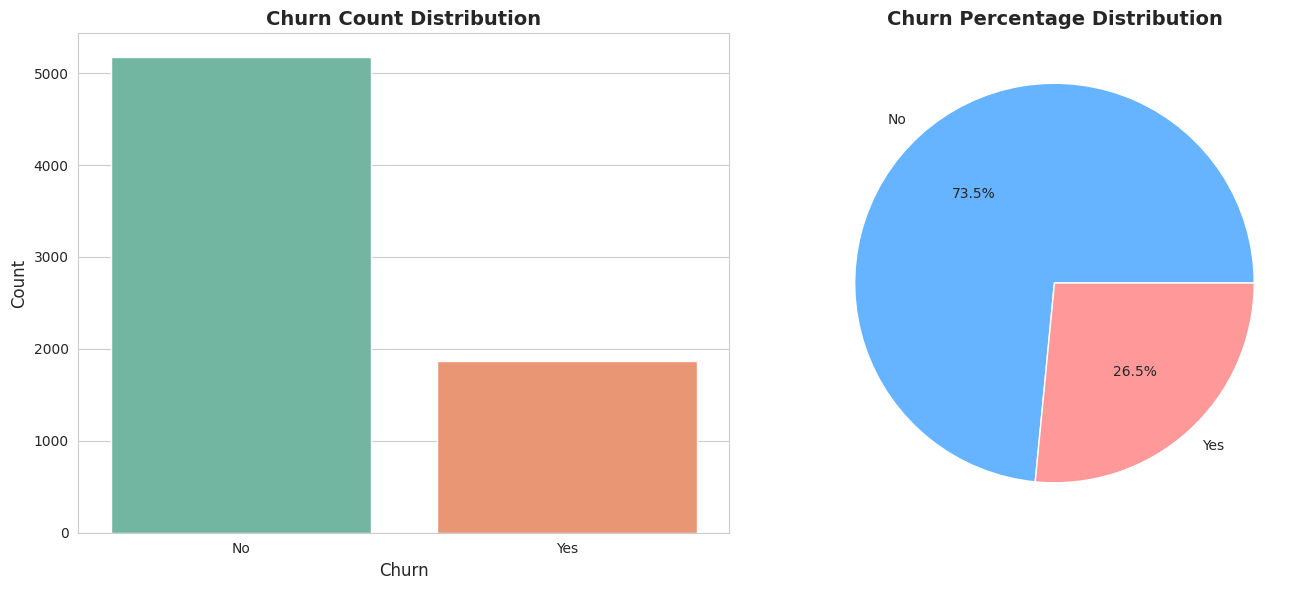

In [14]:
print("="*80)
print("TARGET VARIABLE ANALYSIS (CHURN)")
print("="*80)

if 'Churn' in df.columns:
    churn_counts = df['Churn'].value_counts()
    churn_percent = df['Churn'].value_counts(normalize=True) * 100

    print("\nChurn Distribution:")
    print(churn_counts)
    print("\nChurn Percentage:")
    print(churn_percent)

    # Visualize churn distribution
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Count plot
    sns.countplot(data=df, x='Churn', ax=axes[0], palette='Set2')
    axes[0].set_title('Churn Count Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Churn', fontsize=12)
    axes[0].set_ylabel('Count', fontsize=12)

    # Pie chart
    churn_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
    axes[1].set_title('Churn Percentage Distribution', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()
else:
    print("'Churn' column not found in the dataset")

## 7. Numerical Variables Analysis

NUMERICAL VARIABLES ANALYSIS

Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


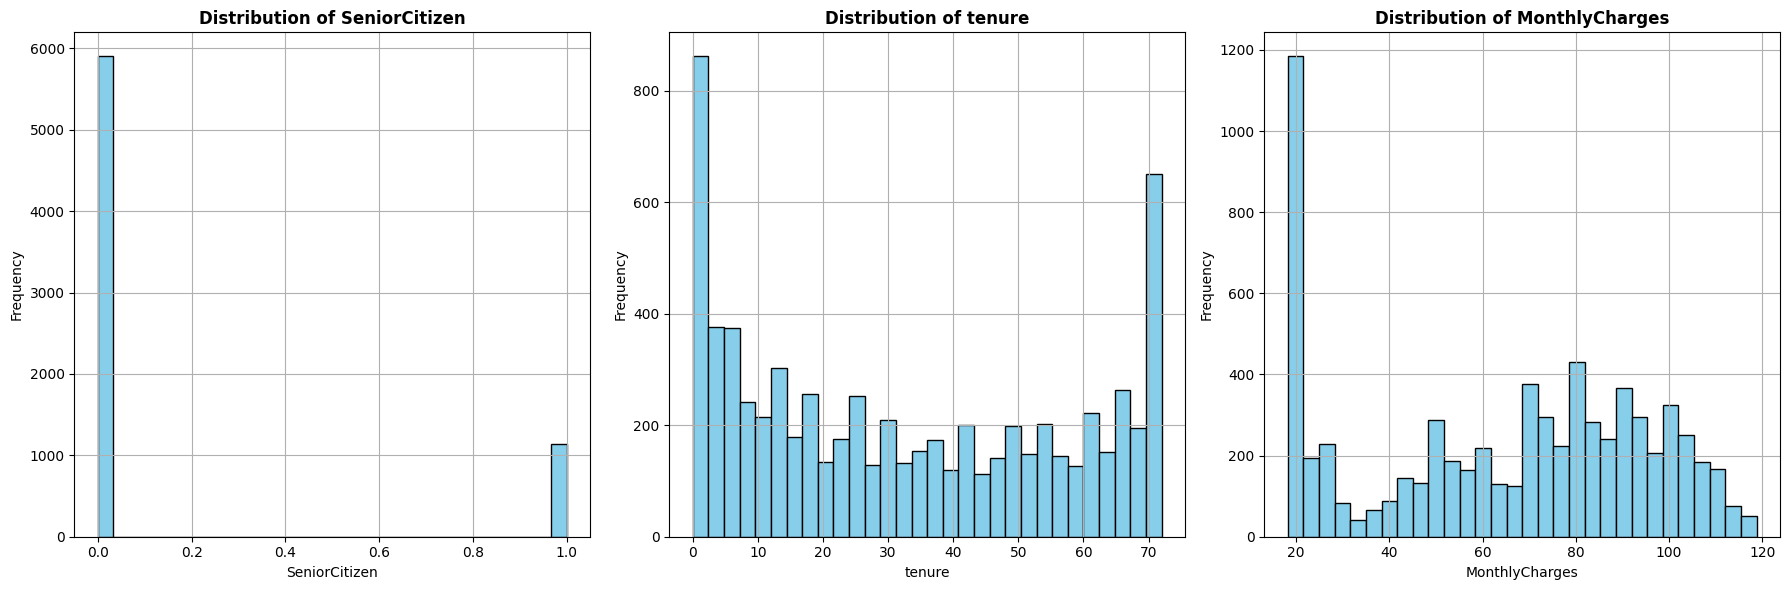

In [3]:
print("="*80)
print("NUMERICAL VARIABLES ANALYSIS")
print("="*80)

# Ensure required libraries are imported (in case cells were run out of order)
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
except ImportError:
    print("Error: Please run the import cell (Section 1) first!")
    raise

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if 'customerID' in numerical_cols:
    numerical_cols.remove('customerID')

if len(numerical_cols) > 0:
    print(f"\nNumerical columns: {numerical_cols}")

    # Distribution plots
    n_cols = len(numerical_cols)
    n_rows = (n_cols + 2) // 3

    fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

    for idx, col in enumerate(numerical_cols):
        if idx < len(axes):
            df[col].hist(bins=30, ax=axes[idx], color='skyblue', edgecolor='black')
            axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel(col, fontsize=10)
            axes[idx].set_ylabel('Frequency', fontsize=10)

    # Hide extra subplots
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found (excluding customerID)")

/tmp/ipython-input-2127618335.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, ax=axes[idx], palette='Set2')
/tmp/ipython-input-2127618335.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, ax=axes[idx], palette='Set2')
/tmp/ipython-input-2127618335.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, ax=axes[idx], palette='Set2')


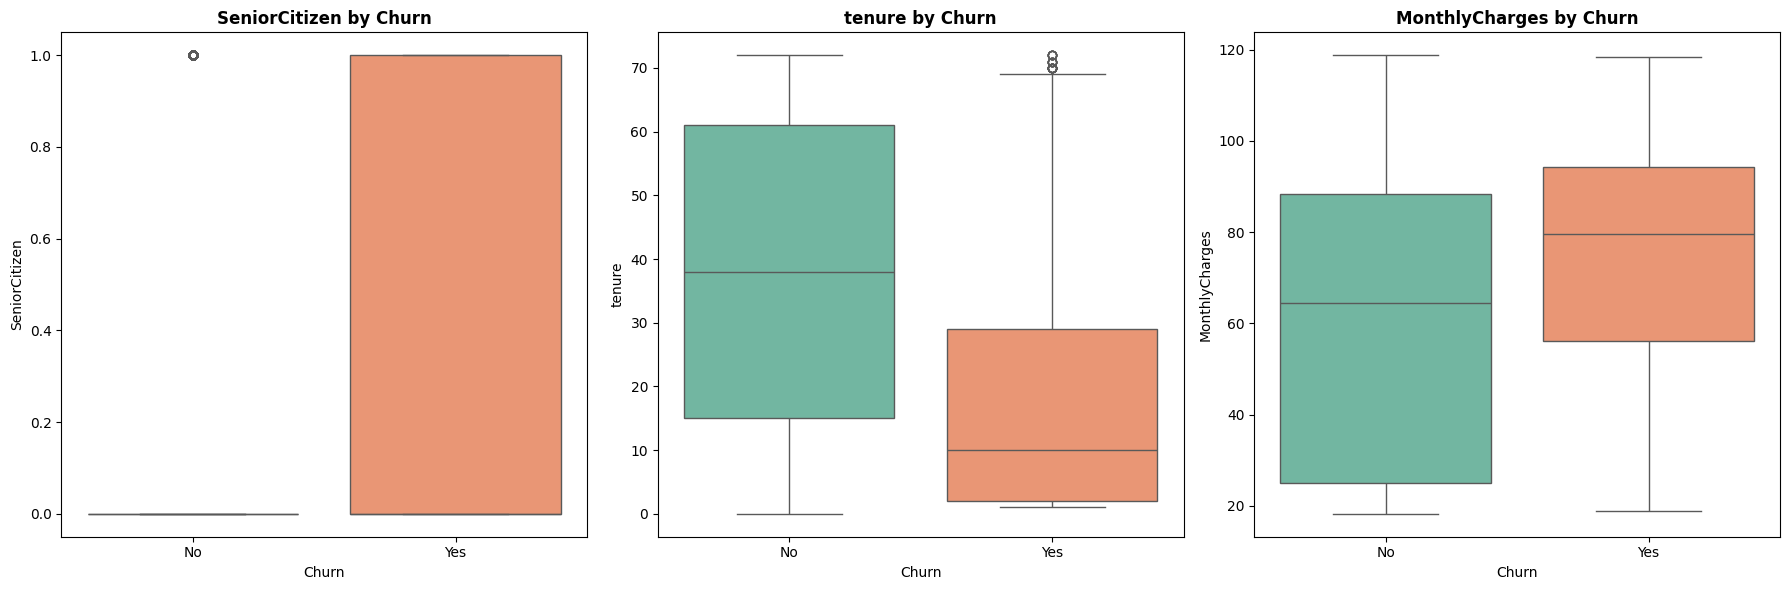

In [4]:
# Box plots comparing numerical variables by Churn status
if 'Churn' in df.columns and len(numerical_cols) > 0:
    n_cols = len(numerical_cols)
    n_rows = (n_cols + 2) // 3

    fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

    for idx, col in enumerate(numerical_cols):
        if idx < len(axes):
            sns.boxplot(data=df, x='Churn', y=col, ax=axes[idx], palette='Set2')
            axes[idx].set_title(f'{col} by Churn', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel('Churn', fontsize=10)
            axes[idx].set_ylabel(col, fontsize=10)

    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

## 8. Categorical Variables Analysis

CATEGORICAL VARIABLES ANALYSIS

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']


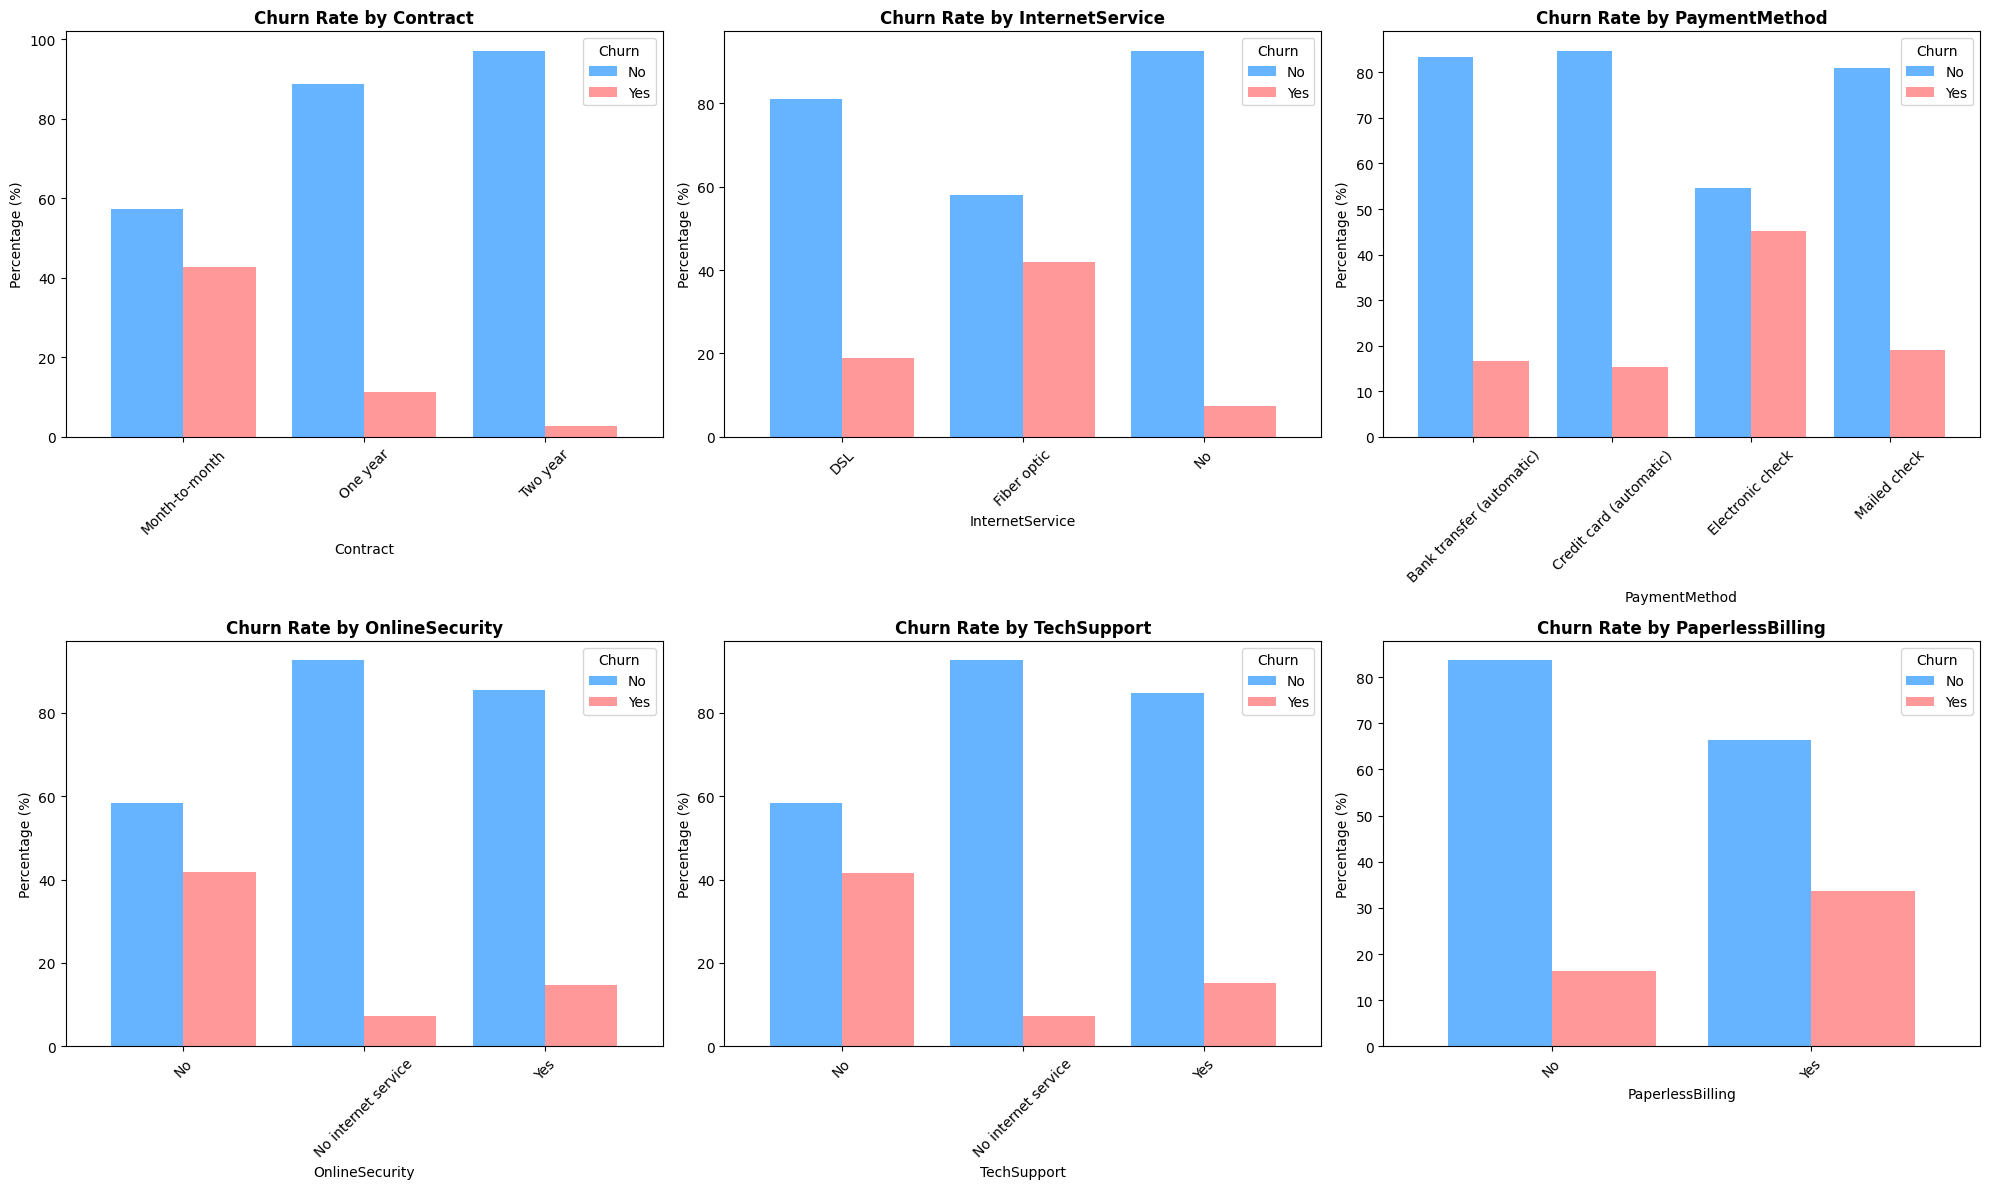

In [5]:
print("="*80)
print("CATEGORICAL VARIABLES ANALYSIS")
print("="*80)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove customerID and Churn from categorical analysis if present
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

if len(categorical_cols) > 0:
    print(f"\nCategorical columns: {categorical_cols}")

    # Create visualizations for key categorical variables vs Churn
    key_categorical_vars = ['Contract', 'InternetService', 'PaymentMethod',
                           'OnlineSecurity', 'TechSupport', 'PaperlessBilling']

    if 'Churn' in df.columns:
        n_vars = len([col for col in key_categorical_vars if col in categorical_cols])
        n_rows = (n_vars + 2) // 3

        fig, axes = plt.subplots(n_rows, 3, figsize=(20, 6*n_rows))
        axes = axes.flatten() if n_rows > 1 else axes

        plot_idx = 0
        for col in key_categorical_vars:
            if col in categorical_cols and plot_idx < len(axes):
                churn_by_cat = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
                churn_by_cat.plot(kind='bar', ax=axes[plot_idx], color=['#66b3ff', '#ff9999'], width=0.8)
                axes[plot_idx].set_title(f'Churn Rate by {col}', fontsize=12, fontweight='bold')
                axes[plot_idx].set_xlabel(col, fontsize=10)
                axes[plot_idx].set_ylabel('Percentage (%)', fontsize=10)
                axes[plot_idx].legend(title='Churn', labels=['No', 'Yes'])
                axes[plot_idx].tick_params(axis='x', rotation=45)
                plot_idx += 1

        # Hide extra subplots
        for idx in range(plot_idx, len(axes)):
            axes[idx].axis('off')

        plt.tight_layout()
        plt.show()
else:
    print("No categorical columns found (excluding customerID and Churn)")


## 9. Correlation Analysis


In [6]:
print("="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Convert categorical variables to numeric for correlation
df_numeric = df.copy()

# Handle TotalCharges - convert to numeric, replacing empty strings with NaN
if 'TotalCharges' in df_numeric.columns:
    df_numeric['TotalCharges'] = pd.to_numeric(df_numeric['TotalCharges'], errors='coerce')

# Encode categorical variables (exclude customerID)
categorical_cols = df_numeric.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'customerID':
        df_numeric[col] = pd.Categorical(df_numeric[col]).codes

# Drop customerID if it exists
if 'customerID' in df_numeric.columns:
    df_numeric = df_numeric.drop('customerID', axis=1)

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

if 'Churn' in correlation_matrix.columns:
    print("\nCorrelation with Churn:")
    churn_corr = correlation_matrix['Churn'].sort_values(ascending=False)
    display(churn_corr.to_frame('Correlation'))

CORRELATION ANALYSIS

Correlation with Churn:


,Correlation
Churn,1.000000
MonthlyCharges,0.193356
PaperlessBilling,0.191825
SeniorCitizen,0.150889
PaymentMethod,0.107062
MultipleLines,0.038037
PhoneService,0.011942
gender,-0.008612
StreamingTV,-0.036581
StreamingMovies,-0.038492


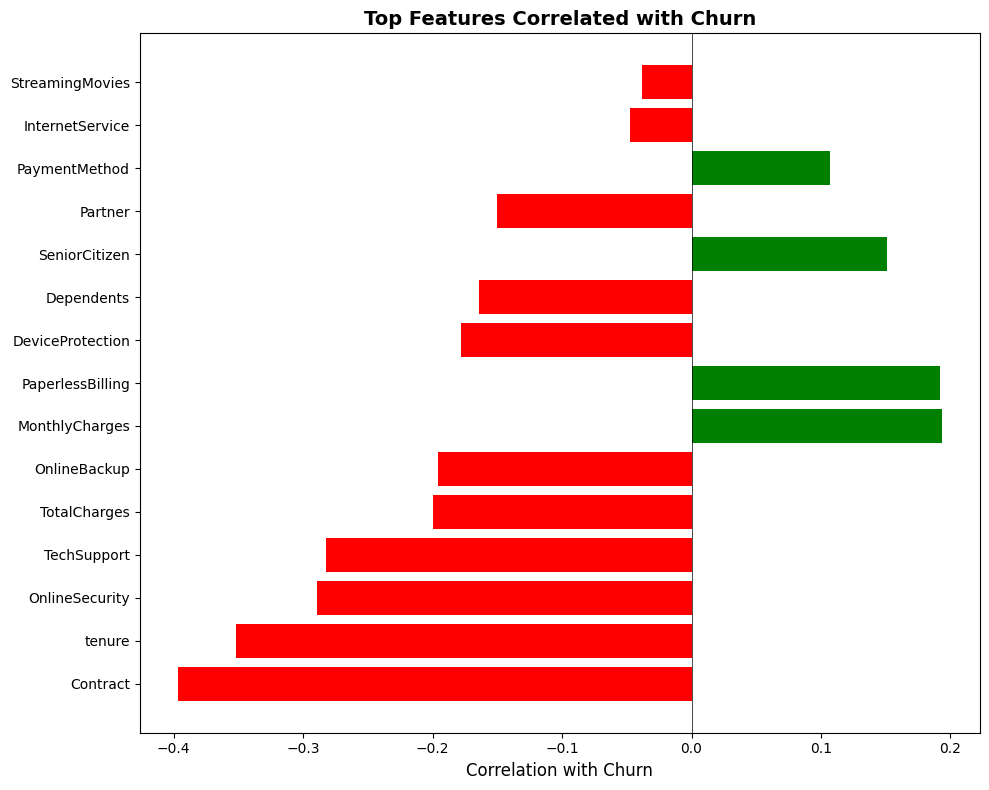


Top Positive Correlations (Higher values → Higher churn):
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
Name: Churn, dtype: float64

Top Negative Correlations (Higher values → Lower churn):
Contract         -0.396713
tenure           -0.352229
OnlineSecurity   -0.289309
TechSupport      -0.282492
TotalCharges     -0.199484
Name: Churn, dtype: float64


In [8]:
# Top correlations with Churn
if 'Churn' in correlation_matrix.columns:
    churn_corr_sorted = churn_corr.drop('Churn').sort_values(key=abs, ascending=False)
    top_corr = churn_corr_sorted.head(15)

    plt.figure(figsize=(10, 8))
    colors = ['red' if x < 0 else 'green' for x in top_corr.values]
    plt.barh(range(len(top_corr)), top_corr.values, color=colors)
    plt.yticks(range(len(top_corr)), top_corr.index)
    plt.xlabel('Correlation with Churn', fontsize=12)
    plt.title('Top Features Correlated with Churn', fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()

    print("\nTop Positive Correlations (Higher values → Higher churn):")
    positive_corr = top_corr[top_corr > 0].head(5)
    print(positive_corr)

    print("\nTop Negative Correlations (Higher values → Lower churn):")
    negative_corr = top_corr[top_corr < 0].head(5)
    print(negative_corr)

## 10. Key Insights Summary

In [9]:
print("="*80)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("="*80)

insights = []

# Insight 1: Dataset size
insights.append(f"1. Dataset contains {df.shape[0]:,} customers with {df.shape[1]} features.")

# Insight 2: Churn rate
if 'Churn' in df.columns:
    churn_rate = (df['Churn'].value_counts(normalize=True) * 100).get('Yes', 0)
    insights.append(f"2. Overall churn rate: {churn_rate:.2f}%")
    insights.append(f"   - Non-churned: {df['Churn'].value_counts().get('No', 0):,} customers ({(100-churn_rate):.2f}%)")
    insights.append(f"   - Churned: {df['Churn'].value_counts().get('Yes', 0):,} customers ({churn_rate:.2f}%)")

# Insight 3: Missing values
missing_count = df.isnull().sum().sum()
if missing_count > 0:
    insights.append(f"3. Total missing values: {missing_count}")
else:
    insights.append("3. ✓ No missing values (NaN) found in the dataset.")
    insights.append("   Note: 11 empty strings found in TotalCharges column (new customers)")

# Insight 4: Data types
numerical_count = len(df.select_dtypes(include=[np.number]).columns)
categorical_count = len(df.select_dtypes(include=['object']).columns)
insights.append(f"4. Dataset has {numerical_count} numerical and {categorical_count} categorical features.")

# Insight 5: Key numerical statistics
if 'tenure' in df.columns:
    insights.append(f"5. Average customer tenure: {df['tenure'].mean():.2f} months")
    insights.append(f"   - Range: {df['tenure'].min()} to {df['tenure'].max()} months")
if 'MonthlyCharges' in df.columns:
    insights.append(f"6. Average monthly charges: ${df['MonthlyCharges'].mean():.2f}")
    insights.append(f"   - Range: ${df['MonthlyCharges'].min():.2f} to ${df['MonthlyCharges'].max():.2f}")

# Insight 6: Key correlations
if 'Churn' in correlation_matrix.columns:
    churn_corr_sorted = correlation_matrix['Churn'].drop('Churn').sort_values(key=abs, ascending=False)
    top_3 = churn_corr_sorted.head(3)
    insights.append(f"\n7. Top 3 features most correlated with Churn:")
    for idx, (feature, corr) in enumerate(top_3.items(), 1):
        insights.append(f"   {idx}. {feature}: {corr:.3f} ({'positive' if corr > 0 else 'negative'} correlation)")

# Print all insights
for insight in insights:
    print(insight)


KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS
1. Dataset contains 7,043 customers with 21 features.
2. Overall churn rate: 26.54%
   - Non-churned: 5,174 customers (73.46%)
   - Churned: 1,869 customers (26.54%)
3. ✓ No missing values (NaN) found in the dataset.
   Note: 11 empty strings found in TotalCharges column (new customers)
4. Dataset has 3 numerical and 18 categorical features.
5. Average customer tenure: 32.37 months
   - Range: 0 to 72 months
6. Average monthly charges: $64.76
   - Range: $18.25 to $118.75

7. Top 3 features most correlated with Churn:
   1. Contract: -0.397 (negative correlation)
   2. tenure: -0.352 (negative correlation)
   3. OnlineSecurity: -0.289 (negative correlation)
